<a href="https://colab.research.google.com/github/Felipe-Oliveira11/TensorFlow-CNN/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Augmentation 


<br>
<hr>
<br>

In [1]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


from PIL import Image 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import glob
import time 



# seed 
tf.random.set_seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, InputLayer
from tensorflow.keras.layers import SpatialDropout2D, GlobalMaxPool2D, LayerNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import SparseCategoricalAccuracy, SparseCategoricalCrossentropy
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# dataset
dataset = '/content/drive/My Drive/Deep Learning - Projetos/Covid-19 x-ray /dataset'

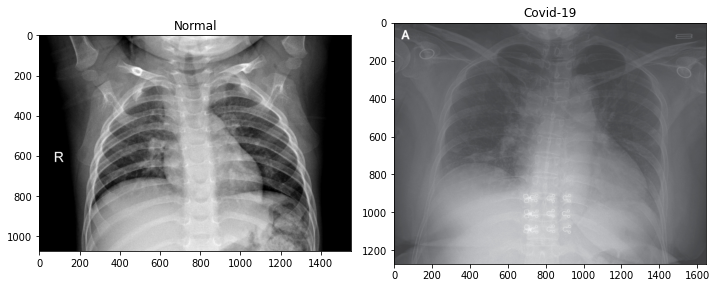

In [4]:
# spliting images 
normal_images = []

for img_path in glob.glob(dataset + '/normal/*'):
  normal_images.append(mpimg.imread(img_path))



plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.title('Normal')
plt.imshow(normal_images[0], cmap='gray')




covid_images = []

for img_path in glob.glob(dataset + '/covid/*'):
  covid_images.append(mpimg.imread(img_path))

plt.subplot(1,2,2)
plt.title('Covid-19')
plt.imshow(covid_images[0], cmap='gray')
plt.tight_layout()

In [5]:
# definindo shape 
image_height = 150
image_width = 150
channels = 3 


# parameters 
input_shape = (image_height, image_width, channels)
number_classe = 2 
batch_size = 6
epochs = 40
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [6]:
# Convolutional Neural Network 

model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=input_shape),
                                    tf.keras.layers.Conv2D(32, (3,3), (1,1), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.LayerNormalization(axis=-1),
                                    tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.SpatialDropout2D(0.20),
                                    tf.keras.layers.Conv2D(128, (3,3), (1,1), padding='same', activation='relu'),                                   
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.LayerNormalization(axis=-1),
                                    tf.keras.layers.Conv2D(256, (3,3), (1,1), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.SpatialDropout2D(0.20),
                                    tf.keras.layers.Conv2D(512, (3,3), (1,1), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.GlobalMaxPool2D(),
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=1, activation='sigmoid')
                                    ])


model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
layer_normalization (LayerNo (None, 75, 75, 32)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

<br>
<br>


### ImageDataGenerator 

Objetivo desta classe é Gerar lotes de tensor de dados de imagem com o aumento de dados em tempo real.


Uma variedade de técnicas é suportada, bem como métodos de dimensionamento de pixels. Vamos nos concentrar em cinco tipos principais de técnicas de aumento de dados para dados de imagem.

* Giro da imagem: <b>horizontal_flip e vertical_flip </b>
* Rotação da imagem: <b> rotation_range </b> Um aumento de rotação gira aleatoriamente a imagem no sentido horário em um determinado número de graus de 0 a 360.É provável que a rotação gire os pixels para fora do quadro da imagem e deixe áreas do quadro sem dados de pixel que devem ser preenchidos.
* Brilho da Imagem: <b> brightness_range </b> O brilho da imagem pode ser aumentado por imagens de escurecimento aleatório, imagens de brilho ou ambas.A intenção é permitir que um modelo generalize as imagens treinadas em diferentes níveis de iluminação.especifica os intervalos mínimo e máximo como um float representando uma porcentagem para selecionar uma quantidade de brilho.Valores menores que 1,0 escurecem a imagem, por exemplo, [0.5, 1.0], enquanto valores maiores que 1.0 iluminam a imagem, por exemplo, [1.0, 1.5], em que 1.0 não afeta o brilho.
* Zoom da Imagem: <b> zoom_range </b> 
* Deslocamento:  <b>width_shift_range e height_shift_range</b> porcentagem (entre 0 e 1) ou pixels [-200, 200] Mudar para uma imagem significa mover todos os pixels da imagem em uma direção, como horizontal ou verticalmente, mantendo as mesmas dimensões da imagem.isso significa que alguns dos pixels serão cortados da imagem e haverá uma região da imagem em que novos valores de pixels deverão ser especificados.
* 

<br>


Parâmetro steps_per_epoch deve inserir: (num_samples // batch_size)



<br>

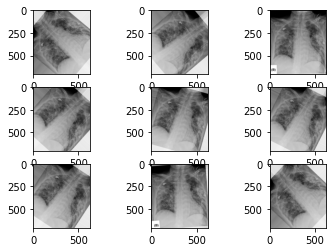

In [7]:
img = load_img('/content/drive/My Drive/Deep Learning - Projetos/Covid-19 x-ray /dataset/covid/covid (1).jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=50)
flow = datagen.flow(samples, batch_size=1)



for i in range(9):
	plt.subplot(3,3, i+1)
	batch = flow.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

In [8]:
# imagem para um array 
array_image = img_to_array(img)
array_image.shape, type(array_image)

((708, 629, 3), numpy.ndarray)

<br>


Não será usado dois Generators pois os dados estão em um mesmo conjunto, neste caso vamos utilizar apenas o treino. 

In [9]:
# Data Augmentation with ImageDataGenerator

aug = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.30,
                             height_shift_range=[-200,200],
                             rotation_range=90, # graus de rotação no sentido horário
                             zoom_range=0.10, 
                             rescale=1./255,
                             brightness_range=[0.5, 1.0]
                             )


 
train_generator = aug.flow_from_directory(directory=dataset,
                            target_size=(150,150),
                            color_mode='rgb',
                            class_mode='binary',
                            subset='training',
                            batch_size=6
                            )




test_generator = aug.flow_from_directory(directory=dataset,
                            target_size=(150,150),
                            color_mode='rgb',
                            class_mode='binary',
                            subset='validation',
                            batch_size=6
                            )


Found 98 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
    )   

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
17/17 [==============================] - 11s 670ms/step - loss: 0.8674 - accuracy: 0.6020
Epoch 2/40
17/17 [==============================] - 11s 632ms/step - loss: 0.6813 - accuracy: 0.7245
Epoch 3/40
17/17 [==============================] - 11s 631ms/step - loss: 0.6157 - accuracy: 0.7449
Epoch 4/40
17/17 [==============================] - 11s 638ms/step - loss: 0.6042 - accuracy: 0.7551
Epoch 5/40
17/17 [==============================] - 11s 657ms/step - loss: 0.6377 - accuracy: 0.6939
Epoch 6/40
17/17 [==============================] - 11s 638ms/step - loss: 0.6081 - accuracy: 0.7143
Epoch 7/40
17/17 [==============================] - 11s 636ms/step - loss: 0.6167 - accuracy: 0.7143
Epoch 8/40
17/17 [==============================] - 11s 633ms/step - loss: 0.5724 - accuracy: 0.7245
Epoch 9/40
17/17 [==============================] - 11s 633ms/step - loss: 0.5917 - accuracy: 0.7245
Epoch 10/40
17/

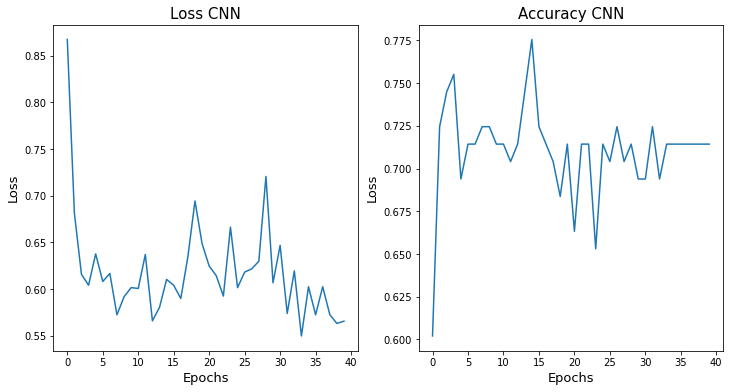

In [11]:
epochs = [i for i in range(0,40)]

fig, ax = plt.subplots(1,2, figsize=(12,6))


# Loss 
ax[0].plot(epochs, history.history['loss'], label='train loss')
ax[0].set_xlabel('Epochs', fontsize=13)
ax[0].set_ylabel('Loss', fontsize=13)
ax[0].set_title('Loss CNN', fontsize=15)


# Accuracy 
ax[1].plot(epochs, history.history['accuracy'], label='train accuracy')
ax[1].set_xlabel('Epochs', fontsize=13)
ax[1].set_ylabel('Loss', fontsize=13)
ax[1].set_title('Accuracy CNN', fontsize=15)

plt.show()

In [12]:
# CNN Archicture 


def cnn(input_shape, block1, block2, block3, block4):
    
   # sequential and input  
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
   
   # Block 1 | Convolutional + LayerNormalization
    model.add(Conv2D(filters=block1[0], kernel_size=block1[1], strides=block1[2], padding=block1[3], activation='relu'))
    model.add(LayerNormalization())
    model.add(Conv2D(filters=block1[0], kernel_size=block1[1], strides=block1[2], padding=block1[3], activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    
   # Block 2 | Convolutional + SpartialDropout
    model.add(Conv2D(filters=block2[0], kernel_size=block2[1], strides=block2[2], padding=block2[3], activation='relu'))
    model.add(Conv2D(filters=block2[0], kernel_size=block2[1], strides=block2[2], padding=block2[3], activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(SpatialDropout2D(0.30))
    
    
              
    # Block 3 | Convolutional + LayerNormalization 
    model.add(Conv2D(filters=block3[0], kernel_size=block3[1], strides=block3[2], padding=block3[3], activation='relu'))
    model.add(LayerNormalization())
    model.add(Conv2D(filters=block3[0], kernel_size=block3[1], strides=block3[2], padding=block3[3], activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    
    # Block 4 | Convolutional + SpartialDropout
    model.add(Conv2D(filters=block4[0], kernel_size=block4[1], strides=block4[2], padding=block4[3], activation='relu'))
    model.add(Conv2D(filters=block4[0], kernel_size=block4[1], strides=block4[2], padding=block4[3], activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(SpatialDropout2D(0.40))
    
    
              
    # Block 5 | GlobalMaxPooling + Fully Connected + Output Layer 
    model.add(GlobalMaxPool2D())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
              
    
    return model